In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from glob import glob

from sklearn.decomposition import TruncatedSVD, NMF
from utils import loadpkl, to_json

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [14]:
# load feathers
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm_notebook(files, mininterval=60)], axis=1)

# split train & test
train_df = df[df['click_mode'].notnull()]
test_df = df[df['click_mode'].isnull()]

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
# load pkls
df = loadpkl('../features/plans.pkl')
queries = loadpkl('../features/queries.pkl')
profiles = loadpkl('../features/profiles.pkl')
#queries_pred = loadpkl('../features/queries_pred.pkl')

In [3]:
# merge
df = pd.merge(df, queries, on='sid', how='left')
df = pd.merge(df, profiles, on='pid', how='left')

del queries, profiles
gc.collect()

train_df = df[df['click_mode'].notnull()]

In [18]:
profiles = profiles[['pid']+['profile_{}'.format(i) for i in range(0,66)]]
df = pd.merge(queries, profiles, on='pid', how='left')

In [21]:
df.drop(['pid','req_time'],axis=1,inplace=True)

In [5]:
df.columns.to_list()

['sid',
 'plan_0_distance',
 'plan_1_distance',
 'plan_2_distance',
 'plan_3_distance',
 'plan_4_distance',
 'plan_5_distance',
 'plan_6_distance',
 'plan_0_price',
 'plan_1_price',
 'plan_2_price',
 'plan_3_price',
 'plan_4_price',
 'plan_5_price',
 'plan_6_price',
 'plan_0_eta',
 'plan_1_eta',
 'plan_2_eta',
 'plan_3_eta',
 'plan_4_eta',
 'plan_5_eta',
 'plan_6_eta',
 'plan_0_transport_mode',
 'plan_1_transport_mode',
 'plan_2_transport_mode',
 'plan_3_transport_mode',
 'plan_4_transport_mode',
 'plan_5_transport_mode',
 'plan_6_transport_mode',
 'plan_time',
 'click_mode',
 'plan_weekday',
 'plan_hour',
 'plan_weekday_hour',
 'plan_time_diff',
 'plan_weekday_count',
 'plan_hour_count',
 'plan_weekday_hour_count',
 'plan_distance_mean',
 'plan_distance_sum',
 'plan_distance_max',
 'plan_distance_min',
 'plan_distance_var',
 'plan_distance_skew',
 'plan_price_mean',
 'plan_price_sum',
 'plan_price_max',
 'plan_price_min',
 'plan_price_var',
 'plan_price_skew',
 'plan_eta_mean',
 'plan

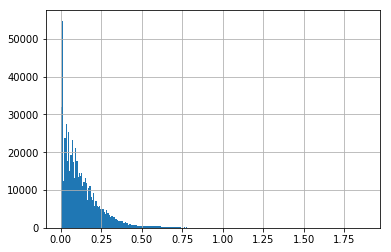

In [9]:
queries.queries_distance.hist(bins=255)

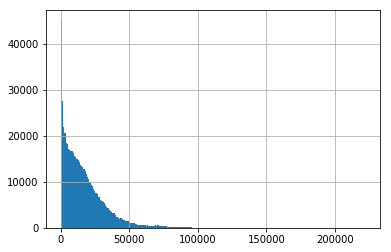

In [11]:
df.plan_1_distance.hist(bins=255)

In [12]:
for i, t in enumerate(['a','b','c']):
    print(i,t)

0 a
1 b
2 c


In [9]:
df.dtypes[df.dtypes=='object']

plan_distance_max_plan                object
plan_distance_min_plan                object
plan_price_max_plan                   object
plan_price_min_plan                   object
plan_eta_max_plan                     object
plan_eta_min_plan                     object
plan_price_distance_ratio_max_plan    object
plan_price_eta_ratio_max_plan         object
plan_price_distance_ratio_min_plan    object
plan_price_eta_ratio_min_plan         object
plan_distance_eta_ratio_max_plan      object
plan_distance_eta_ratio_min_plan      object
plan_distance_ratio_0_max_plan        object
plan_distance_ratio_0_min_plan        object
plan_price_ratio_0_max_plan           object
plan_price_ratio_0_min_plan           object
plan_eta_ratio_0_max_plan             object
plan_eta_ratio_0_min_plan             object
dtype: object

In [16]:
df.dtypes

sid                                         int64
plan_0_distance                             int64
plan_1_distance                           float64
plan_2_distance                           float64
plan_3_distance                           float64
plan_4_distance                           float64
plan_5_distance                           float64
plan_6_distance                           float64
plan_0_price                                int64
plan_1_price                              float64
plan_2_price                              float64
plan_3_price                              float64
plan_4_price                              float64
plan_5_price                              float64
plan_6_price                              float64
plan_0_eta                                  int64
plan_1_eta                                float64
plan_2_eta                                float64
plan_3_eta                                float64
plan_4_eta                                float64
